# Intro a Bases de Datos

Los objetivos de aprendizaje son:

1. ¿Qué es una base de datos?
2. ¿Por qué usar una base de datos?
3. ¿Cómo interactuar con una base de datos?
    - BD en archivo único.
    - BD en servidor.
    - Servidores distribuidos
4. Bases de datos SQL
    - SQL.
        - Modelo Centralizado
        - Modelo Relacional
            - Primary key
            - Foreing key
7. Relaciones y Bases de Datos Relacionales
8. Lenguaje SQL
9. SQLModel 
10. Bases de datos NoSQL

## ¿Qué es una base de datos?

Es un sistema para almacenar y gestionar datos de forma estructurada y muy eficiente.

>**Nota**: Es muy común abreviar la palabra "base de datos" como "DB".

Hay mucha documentación sobre las bases de datos, y puede volverse muy técnica y académica, aquí veremos una descripción general y rápida de algunos de los conceptos principales.


## ¿Por qué usar una base de datos?

Al comenzar a programar, puede que no sea obvio por qué es una buena idea tener una base de datos si ta tenemos estructuras de datos como listas o diccionarios.

**¿Por qué necesitaríamos tener una base de datos separada?**

En la mayoría de los casos, el objetivo de un programa es hacer algo con datos, los datos normalmente provienen de fuera y suelen terminar fuera del programa.

Una opción sería usar archivos planos (.csv). Y eso funciona en casos simples. Pero para la mayoría de los sistemas complejos con datos, esa estrategia no es muy eficiente. Tendríamos que lidiar con muchas desventajas, e.g.:

- Mantener los datos sincronizados
- Asegurarse de que estén almacenados de forma segura, etc.


Las bases de datos están diseñadas para resolver estos problemas, haciendo que el proceso de datos sea mucho más eficiente e independiente del código.


## ¿Cómo interactuar con una base de datos?


### BD en archivo único.

Una base de datos podría ser un solo archivo llamado `asegurados.db`, administrado con código de una manera muy eficiente. Un ejemplo de este paradigma es **SQLite**.

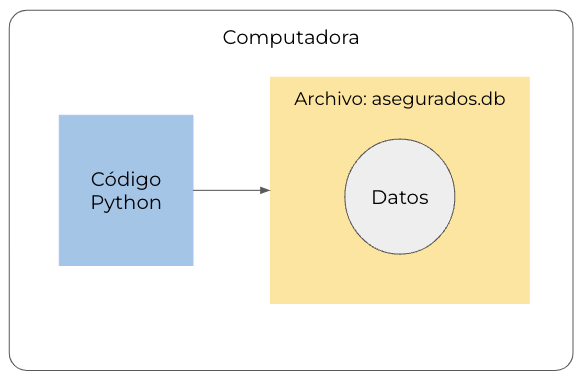


### BD en servidor.

Una base de datos también podría ser un sistema en forma de una aplicación en un servidor, que gestiona múltiples archivos internamente en formatos optimizados.

Ese es el tipo más común de interacción con una base de datos.

En este caso, nuestro código hablaría con la aplicación de servidor en lugar de leer o modificar archivos directamente.

La base de datos podría estar ubicada en un servidor/computadora diferente:

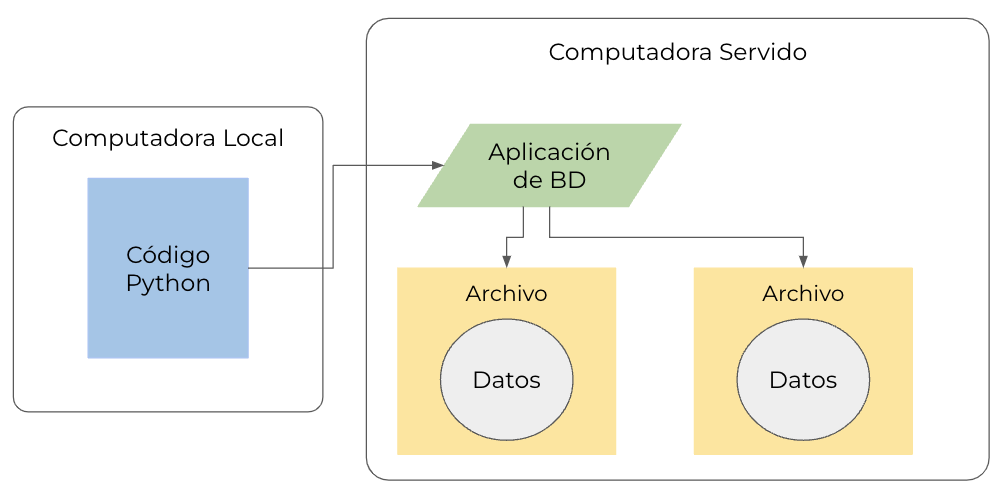

O la base de datos podría estar ubicada en el mismo servidor/computadora:

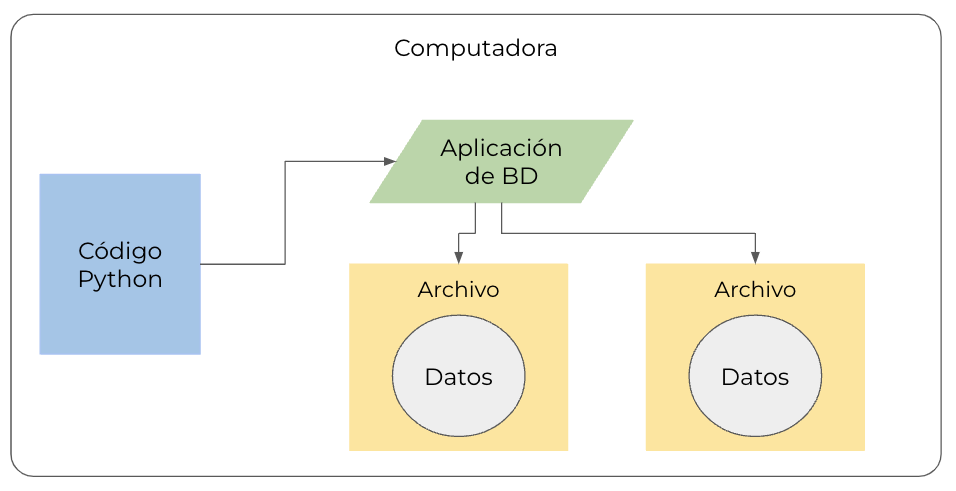

El aspecto más importante de este tipo de bases de datos es que nuestro código python no lee ni modifica los archivos que contienen los datos directamente.

En cambio, el código python se comunica con la aplicación de base de datos y esa aplicación de base de datos es la que realmente lee y modifica los archivos de datos.

Esto se debe a que esta aplicación de base de datos normalmente es mucho más eficiente de lo que podría ser nuestro código.

Algunos ejemplos de bases de datos que funcionan así podrían ser PostgreSQL, MySQL.


## Bases de datos SQL

Existen muchs tipos de bases de datos, pero en general se pueden separa en dos grandes grupos:

- SQL

- NoSQL

### SQL

Hace mucho tiempo IBM desarrolló una excelente forma de almacenar datos colocándolos en diferentes tablas.

Y por "tabla" me refiero solo a datos en forma cuadrículada, con diferentes columnas y filas, casi como una sola hoja de cálculo.

Cada fila representaría un elemento o registro específico. Y cada columna representaría un atributo o campo específico de ese registro.

#### Modelo Centralizado

Imaginemos que necesitamos almacenar algunos datos sobre asegurados.

Si trabajáramos con una sola tabla para almacenar a nuestros asegurados, podría quedar así:

In [1]:
import pandas as pd

data = pd.DataFrame(
    data={
        'id': [1, 2, 3],
        'nombre': ["Heber", "Joaquim", "Antonio"],
        'lob': ["Autos", "Hogar", "Atos"],
        'edad': [30, 35, 40],
        'provincia': ["barcelona", "tarragona", "madrid"],
        'comunidad': ["cataluña", "cataluña", "madrid"],
    }
)
data

,id,nombre,lob,edad,provincia,comunidad
0,1,Heber,Autos,30,barcelona,cataluña
1,2,Joaquim,Hogar,35,tarragona,cataluña
2,3,Antonio,Atos,40,madrid,madrid


Este podría ser nuestro modelo de datos usando una sola tabla.

Pero hay algunos problemas con esto:

1. Imaginemos que queremos cambiar "cataluña" por ""catalunya"". Tendríamos que actualizar eso en dos lugares. ¿Qué sucede si nuestro código comienza a actualizarlo y falla a la mitad? Podríamos terminar con información inconsistente.
<br>

In [2]:
CAT_PROV = ["barcelona", "gerona", "lerida"]
data["comunidad"] = data[
    ["provincia", "comunidad"]
].apply(
    lambda row: "catalunya" if row[0] in CAT_PROV else row[1],
    axis=1
)
data

,id,nombre,lob,edad,provincia,comunidad
0,1,Heber,Autos,30,barcelona,catalunya
1,2,Joaquim,Hogar,35,tarragona,cataluña
2,3,Antonio,Atos,40,madrid,madrid


2. Qué pasa si queremos añadir un nuevo registro y nos olvidamos que en lugar de "household" debemos usar "hogar".

In [3]:
data = pd.concat(
    [pd.DataFrame(
        data={
            'id': [4],
            'nombre': ["Juan"],
            'lob': ["household"],
            'edad': [25],
            'provincia': ["barcelona"],
            'comunidad': ["catalunya"],
        }
    ), data]
).reset_index(
).drop(
    columns='index'
)
data

,id,nombre,lob,edad,provincia,comunidad
0,4,Juan,household,25,barcelona,catalunya
1,1,Heber,Autos,30,barcelona,catalunya
2,2,Joaquim,Hogar,35,tarragona,cataluña
3,3,Antonio,Atos,40,madrid,madrid


3. ¿Qué pasaría si un asegurado tiene dos pólizas? ¿Cómo podemos incorporar esta posibilidad a nuestro modelo de datos?

#### Modelo Relacional

Estos y otros problemas podrían resolverse mejor al tener los datos en varias tablas.

Entonces, en lugar de tener una sola tabla con todos los datos, podríamos tener una tabla para los asegurados, y otra para los atrubitos goegráficos, y una forma de conectar una con la otra.

La tabla de los atributos geográficos podría verse así:

In [4]:
provincias = pd.DataFrame(
    data={
        'id': [1, 2, 3],
        'provincia': ["barcelona", "tarragona", "madrid"],
        'comunidad': ["cataluña", "cataluña", "madrid"],
    }
)
provincias

,id,provincia,comunidad
0,1,barcelona,cataluña
1,2,tarragona,cataluña
2,3,madrid,madrid


La tabla de los asegurados se vería casi igual, salvo que ahora tendría otra columna `provincia_id`. Esta columna muestra la relación de cada asegurado con la comunidad a al que pertenece.

In [5]:
asegurados = pd.DataFrame(
    data={
        'id': [1, 2, 3, 4],
        'nombre': ["Heber", "Joaquim", "Antonio", "Juan"],
        'lob': ["Autos", "Hogar", "Atos", "Hogar"],
        'edad': [30, 35, 40, 25],
        'provincia_id': [1, 2, 3, 1]
    }
)
asegurados

,id,nombre,lob,edad,provincia_id
0,1,Heber,Autos,30,1
1,2,Joaquim,Hogar,35,2
2,3,Antonio,Atos,40,3
3,4,Juan,Hogar,25,1


##### Primary key

En el ejemplo anterior cada registro tiene un `id`, cada `id` es único por tabla y sirve para identificar a un registro en particular.

Las BD SQL requieren tener una forma única de identificar cada registro en una tabla. Podría ser una combinación de columnas única, pero comúnmente es una sola columna. Esto se llama **Primary key**.


La **Primary key** normalmente es un número entero generado automáticamente por la base de datos y, en muchos casos, la columna simplemente se llama id.

##### Foreing key

Dado que la **Primary key** identifica de manera única a una provincia, podemos usarla en la tabla de asegurados para indicar a qué provincia pertence cada asegurado.

![image-4.png](attachment:image.png)


En la tabla de asegurados tenemos una **Primary key** llamada `id`. Pero también tenemos otra columna llamada `provincia_id` que hace referencia a la **Primary key** de una tabla foranea. Por tanto la columna `provincia_id` es una **foreign key**.


## Relaciones y Bases de Datos Relacionales

El término técnico para estas tablas es "relación" (*relation*).

>**Nota**: La palabra "relación" en el contexto técnico de BD no hace referencia a la relación que existe entre las talas, sino a la tabla.


Por este termino las bases de datos SQL también son conocidas como bases de datos relacionales.

> **Nota**: Bases de datos relacionales sólo ace referencia al modelo de datos.

## Lenguaje SQL

Después de desarrollar el modelo de datos relacional, IBM también diseñó un lenguaje para interactual con el modelo.

El lenguaje lo llamaron SQL, que significa *Structured Query Language*.

> **Nota**: El lenguaje SQL no sólo se usa para consultar los datos, también se usa para crear registros, actualizarlos, eliminarlos.  También sirve para manipular bases de datos, e.g crear tablas, etc.

Cada aplicación de base de datos (e.g. PostgreSQL, MySQL, SQLite, etc.) soporta una variante del lenguaje original SQL.

Supongamos que la tabla que contiene a los asegurados se llama `asegurados`, un ejemplo de una query en SQL para obtener todos los registros de esta tabla se vería así:

``` SQL
SELECT *
FROM asegurados; 
```

## SQLModel

Es un paquete escrito en Python que nos ayuda a:

1. Transformar código y objetos de python a código SQL.
2. Comunicarse con las APIs de bases de datos para enviar y recibir información.


>**Nota**: `SQLModel` está construida sobre `SQLAlchemy` y `Pydantic`, además de ser más intuitiva de usar, cuenta con una documentación bastante amplia y actualizada.